<a href="https://colab.research.google.com/github/FakhrizaBondanP/CLUSTERINSIGHT-Sistem-Segmentasi-Pelanggan-Berbasis-Machine-Learning-Menggunakan-Algoritma-K-Means-/blob/main/TUBES_AI_KELOMPOK_2_TK_46_%26_47_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q seaborn scikit-learn

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Visualization theme
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)


In [ ]:
FILEPATH = "/content/Customers.csv"

if not os.path.exists(FILEPATH):
    print("Customers.csv tidak ditemukan — silakan upload file")
    from google.colab import files
    uploaded = files.upload()
    FILEPATH = "/content/" + list(uploaded.keys())[0]

df_raw = pd.read_csv(FILEPATH)

Customers.csv tidak ditemukan — silakan upload file


Saving Supermarket Sales Cleaned new verison.csv to Supermarket Sales Cleaned new verison.csv


In [ ]:
df_raw.head()

,Customer type,Gender,Product line,Unit price,Quantity,Time,Payment,Gross margin,Rating,Day,Month
0,Member,Female,Health and beauty,74.69,7,13:08,Ewallet,4.761905,9.1,5,1
1,Normal,Female,Electronic accessories,15.28,5,10:29,Cash,4.761905,9.6,8,3
2,Normal,Male,Home and lifestyle,46.33,7,13:23,Credit card,4.761905,7.4,3,3
3,Member,Male,Health and beauty,58.22,8,20:33,Ewallet,4.761905,8.4,27,1
4,Normal,Male,Sports and travel,86.31,7,10:37,Ewallet,4.761905,5.3,8,2


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer type  1000 non-null   object 
 1   Gender         1000 non-null   object 
 2   Product line   1000 non-null   object 
 3   Unit price     1000 non-null   float64
 4   Quantity       1000 non-null   int64  
 5   Time           1000 non-null   object 
 6   Payment        1000 non-null   object 
 7   Gross margin   1000 non-null   float64
 8   Rating         1000 non-null   float64
 9   Day            1000 non-null   int64  
 10  Month          1000 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 86.1+ KB


In [ ]:
df_raw.describe()

,Unit price,Quantity,Gross margin,Rating,Day,Month
count,1000.000000,1000.000000,1.000000e+03,1000.00000,1000.000000,1000.000000
mean,55.672130,5.510000,4.761905e+00,6.97270,15.256000,1.993000
std,26.494628,2.923431,6.131498e-14,1.71858,8.693563,0.835254
min,10.080000,1.000000,4.761905e+00,4.00000,1.000000,1.000000
25%,32.875000,3.000000,4.761905e+00,5.50000,8.000000,1.000000
50%,55.230000,5.000000,4.761905e+00,7.00000,15.000000,2.000000
75%,77.935000,8.000000,4.761905e+00,8.50000,23.000000,3.000000
max,99.960000,10.000000,4.761905e+00,10.00000,31.000000,3.000000


In [ ]:
missing = df_raw.isnull().sum()
missing

,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Time,0
Payment,0
Gross margin,0
Rating,0
Day,0


In [ ]:
# check isi data, siapa tau ada macam ide atau kategorikal

for col in df_raw.columns:
    print(col)
    display(df_raw[col].value_counts().to_frame().T)
    print()


Customer type


Customer type,Member,Normal
count,501,499



Gender


Gender,Female,Male
count,501,499



Product line


Product line,Fashion accessories,Food and beverages,Electronic accessories,Sports and travel,Home and lifestyle,Health and beauty
count,178,174,170,166,160,152



Unit price


Unit price,83.77,84.05,60.30,64.08,19.15,73.47,78.31,95.54,89.48,72.88,...,23.48,14.70,28.45,57.95,47.65,42.82,48.09,55.97,76.90,99.78
count,3,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1



Quantity


Quantity,10,1,4,7,5,6,9,2,3,8
count,119,112,109,102,102,98,92,91,90,85



Time


Time,19:48,14:42,17:38,17:36,19:39,17:16,11:40,10:11,19:30,11:51,...,10:58,13:49,11:10,13:33,14:05,16:27,15:23,18:18,15:17,19:12
count,7,7,6,5,5,5,5,5,5,5,...,1,1,1,1,1,1,1,1,1,1



Payment


Payment,Ewallet,Cash,Credit card
count,345,344,311



Gross margin 


Gross margin,4.761905
count,1000



Rating


Rating,6.0,6.6,9.5,4.2,5.1,6.5,8.0,5.0,6.2,7.6,...,6.8,4.8,8.1,9.4,4.7,5.3,8.3,4.0,4.6,10.0
count,26,24,22,22,21,21,21,21,21,20,...,13,13,13,12,12,11,11,11,8,5



Day


Day,15,25,8,5,19,2,14,26,27,7,...,1,22,13,11,16,18,29,21,30,31
count,44,42,41,41,41,40,39,39,38,38,...,28,28,28,27,27,23,20,20,20,14



Month


Month,1,3,2
count,352,345,303


Hasil dari pengecekan adalah:
- Month termasuk kategori -> hanya 3 jenis

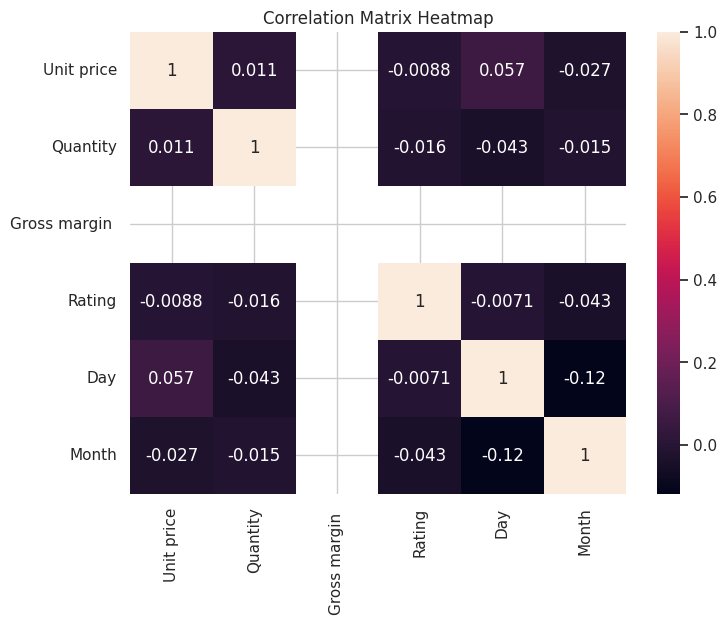

In [ ]:
numeric_cols = df_raw.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
sns.heatmap(
    corr_matrix,
    annot=True
)

# Optional: Customize plot
plt.title('Correlation Matrix Heatmap')
plt.show() # Display the plot

In [ ]:
# Ambil kolom Kategori
cat_cols = df_raw.select_dtypes(include=['object'])
print("Categorical:")
print(list(cat_cols))

Categorical:
['Customer type', 'Gender', 'Product line', 'Time', 'Payment']


In [ ]:
# Encoding:
# Onehot semua

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


categorical_columns = df_raw.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('Time')
categorical_columns.append('Month') # tambah kolom month

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df_raw[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([df_raw, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

In [ ]:
df_encoded

,Unit price,Quantity,Time,Gross margin,Rating,Day,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,...,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Month_1,Month_2,Month_3
0,74.69,7,13:08,4.761905,9.1,5,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,15.28,5,10:29,4.761905,9.6,8,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,46.33,7,13:23,4.761905,7.4,3,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,58.22,8,20:33,4.761905,8.4,27,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,86.31,7,10:37,4.761905,5.3,8,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,13:46,4.761905,6.2,29,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
996,97.38,10,17:16,4.761905,4.4,2,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,31.84,1,13:22,4.761905,7.7,9,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
998,65.82,1,15:33,4.761905,4.1,22,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# encode HH:MM → menit
df_encoded[["HH", "MM"]] = df_encoded["Time"].str.split(":", expand=True).astype(int)
df_encoded["time_min"] = df_encoded["HH"] * 60 + df_encoded["MM"]
df_encoded = df_encoded.drop(columns=["Time", "HH", "MM"])

In [ ]:
df = df_encoded.drop(columns=['Gross margin '])

In [ ]:
df

,Unit price,Quantity,Rating,Day,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,...,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Month_1,Month_2,Month_3,time_min
0,74.69,7,9.1,5,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,788
1,15.28,5,9.6,8,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,629
2,46.33,7,7.4,3,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,803
3,58.22,8,8.4,27,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1233
4,86.31,7,5.3,8,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,6.2,29,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,826
996,97.38,10,4.4,2,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1036
997,31.84,1,7.7,9,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,802
998,65.82,1,4.1,22,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,933


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


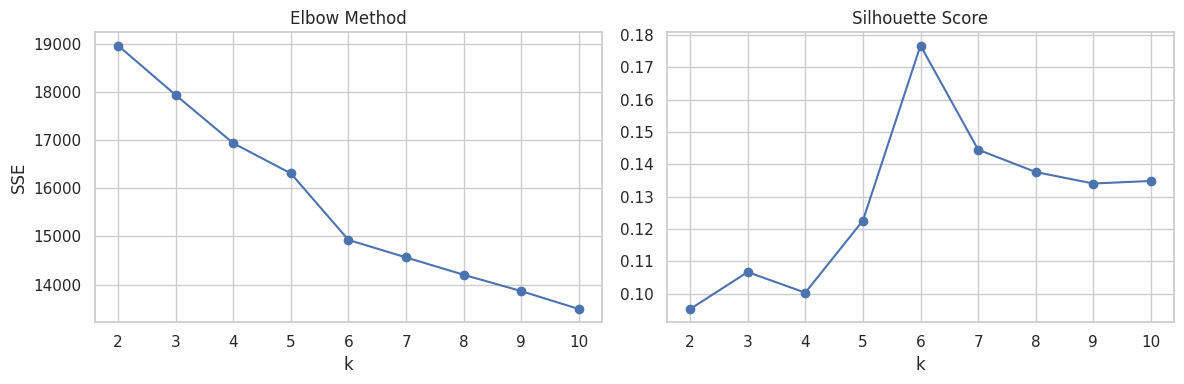

In [ ]:
sse, sil = [], []
K = range(2,11)

for k in K:
    model = KMeans(n_clusters=k,random_state=42,n_init=10)
    labels = model.fit_predict(X_scaled)

    sse.append(model.inertia_)
    sil.append(silhouette_score(X_scaled,labels))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(K,sse,marker='o')
plt.title("Elbow Method")
plt.xlabel("k"); plt.ylabel("SSE")

plt.subplot(1,2,2)
plt.plot(K,sil,marker='o')
plt.title("Silhouette Score")
plt.xlabel("k")

plt.tight_layout()
plt.show()


In [ ]:
chosen_k = 4
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
df["cluster_kmeans"] = kmeans.fit_predict(X_scaled)

# centroid di space asli (VALID)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids)

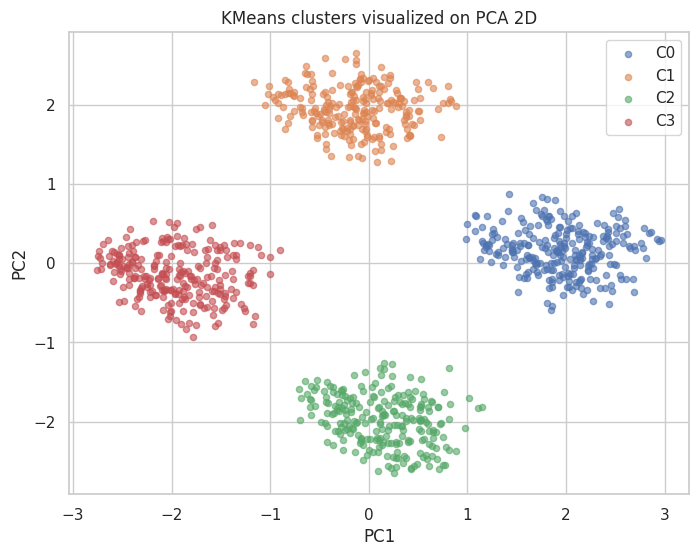

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for i in range(chosen_k):
    mask = df["cluster_kmeans"] == i
    plt.scatter(X_pca[mask,0], X_pca[mask,1],
                s=20, alpha=0.6, label=f"C{i}")

plt.legend()
plt.title("KMeans clusters visualized on PCA 2D")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

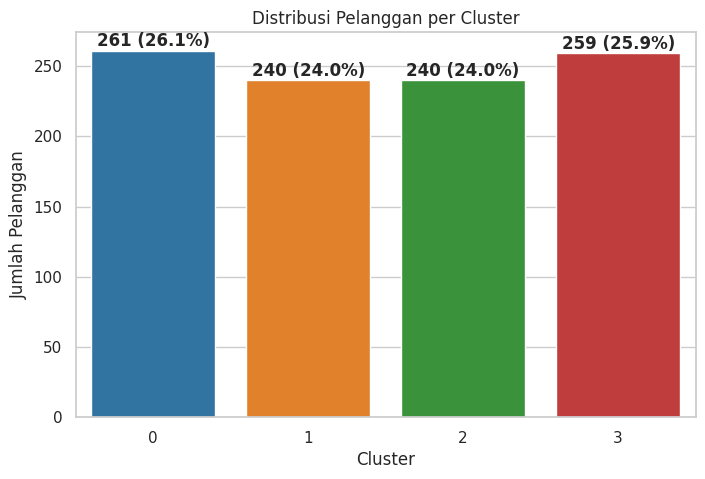


=== KESIMPULAN ===

- Cluster 0: 261 pelanggan (26.1%)
- Cluster 1: 240 pelanggan (24.0%)
- Cluster 2: 240 pelanggan (24.0%)
- Cluster 3: 259 pelanggan (25.9%)

Total pelanggan yang dianalisis: 1000 orang.


In [ ]:
# Hitung jumlah pelanggan per cluster
cluster_counts = df['cluster_kmeans'].value_counts().sort_index()

# Hitung persentase
cluster_percent = (cluster_counts / len(df) * 100).round(2)

# ============== BAR CHART ==============
plt.figure(figsize=(8,5))

sns.barplot(
    x=cluster_counts.index,
    y=cluster_counts.values,
    hue=cluster_counts.index,
    palette="tab10",
    legend=False
)

plt.title("Distribusi Pelanggan per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Pelanggan")

# tampilkan angka di atas bar
for i, v in enumerate(cluster_counts.values):
    plt.text(i, v + 3, f"{v} ({cluster_percent[i]}%)",
             ha='center', fontweight='bold')

plt.show()


# ============== TEKS KESIMPULAN ==============
print("\n=== KESIMPULAN ===\n")

for c in cluster_counts.index:
    print(f"- Cluster {c}: {cluster_counts[c]} pelanggan ({cluster_percent[c]}%)")

print(f"\nTotal pelanggan yang dianalisis: {len(df)} orang.")


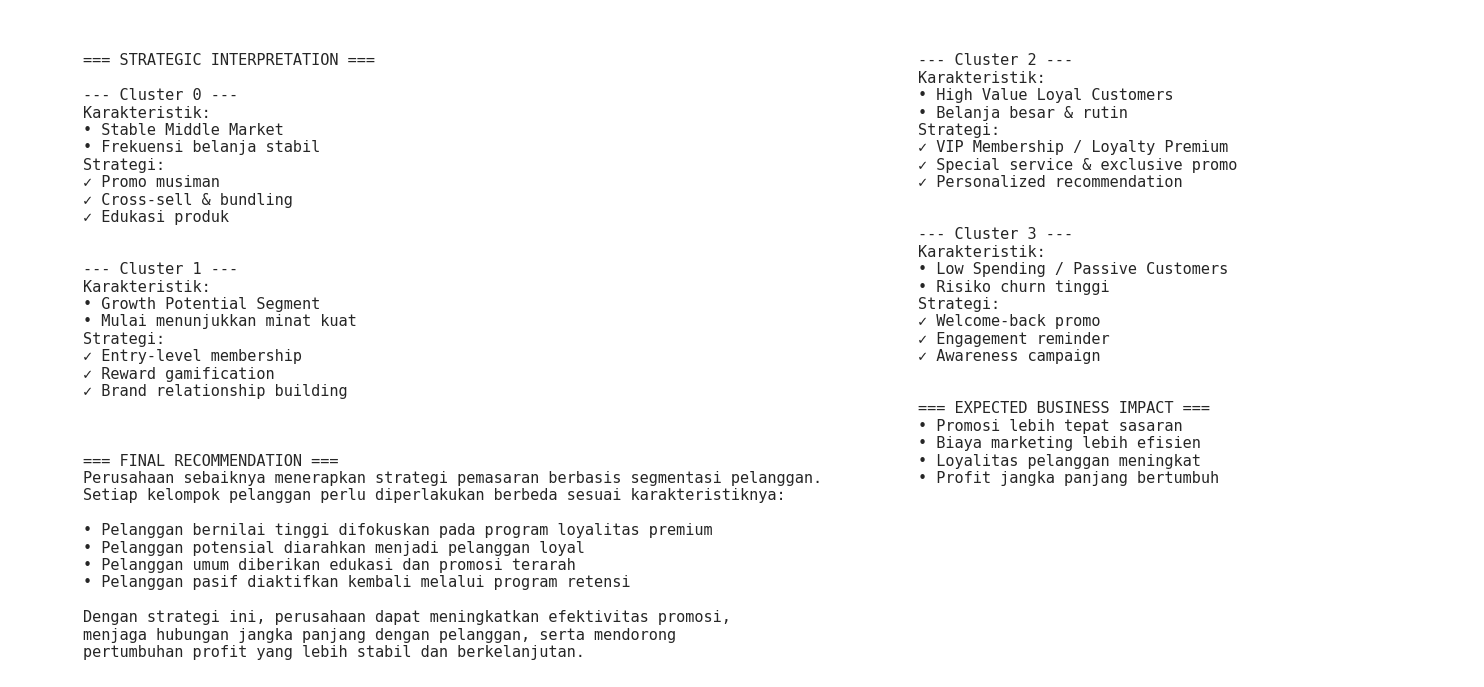

In [ ]:
import matplotlib.pyplot as plt

# ===== TEKS KIRI =====
left_text = """
=== STRATEGIC INTERPRETATION ===

--- Cluster 0 ---
Karakteristik:
• Stable Middle Market
• Frekuensi belanja stabil
Strategi:
✓ Promo musiman
✓ Cross-sell & bundling
✓ Edukasi produk


--- Cluster 1 ---
Karakteristik:
• Growth Potential Segment
• Mulai menunjukkan minat kuat
Strategi:
✓ Entry-level membership
✓ Reward gamification
✓ Brand relationship building
"""


# ===== TEKS KANAN =====
right_text = """
--- Cluster 2 ---
Karakteristik:
• High Value Loyal Customers
• Belanja besar & rutin
Strategi:
✓ VIP Membership / Loyalty Premium
✓ Special service & exclusive promo
✓ Personalized recommendation


--- Cluster 3 ---
Karakteristik:
• Low Spending / Passive Customers
• Risiko churn tinggi
Strategi:
✓ Welcome-back promo
✓ Engagement reminder
✓ Awareness campaign


=== EXPECTED BUSINESS IMPACT ===
• Promosi lebih tepat sasaran
• Biaya marketing lebih efisien
• Loyalitas pelanggan meningkat
• Profit jangka panjang bertumbuh
"""


# ===== FINAL RECOMMENDATION =====
conclusion_text = """
=== FINAL RECOMMENDATION ===
Perusahaan sebaiknya menerapkan strategi pemasaran berbasis segmentasi pelanggan.
Setiap kelompok pelanggan perlu diperlakukan berbeda sesuai karakteristiknya:

• Pelanggan bernilai tinggi difokuskan pada program loyalitas premium
• Pelanggan potensial diarahkan menjadi pelanggan loyal
• Pelanggan umum diberikan edukasi dan promosi terarah
• Pelanggan pasif diaktifkan kembali melalui program retensi

Dengan strategi ini, perusahaan dapat meningkatkan efektivitas promosi,
menjaga hubungan jangka panjang dengan pelanggan, serta mendorong
pertumbuhan profit yang lebih stabil dan berkelanjutan.
"""


# ===== BUAT CANVAS =====
plt.figure(figsize=(15,7))
plt.axis('off')

# kiri
plt.text(0.05, 0.95, left_text,
         fontsize=11,
         va='top',
         family='monospace')

# kanan (digeser lebih ke kanan → 0.62)
plt.text(0.62, 0.95, right_text,
         fontsize=11,
         va='top',
         family='monospace')

# bawah (tetap di kiri agar rapi)
plt.text(0.05, 0.18, conclusion_text,
         fontsize=11,
         va='top',
         family='monospace')

plt.tight_layout()
plt.show()


In [ ]:
# =========================================================
# Save Output
# =========================================================

output = "/content/customers_with_clusters.csv"
df.to_csv(output,index=False)

print("Saved:", output)


Saved: /content/customers_with_clusters.csv
